# Trabajo Integrador - Vdovichenko Walter


## -------------------------------------------------------------------
## Delitos En la Ciudad de Buenos Aires - 2019


![Imagen](BsAs_img.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
delitosBsAs = pd.read_csv("delitos2019.csv")
delitosBsAs

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123
...,...,...,...,...,...,...,...,...,...,...
117656,486770,2019-12-31,18,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,486678,2019-12-31,4,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,486668,2019-12-31,1,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,486750,2019-12-31,14,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145


### *Tipo de datos del DataFrame*

In [3]:
delitosBsAs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117661 entries, 0 to 117660
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   117661 non-null  int64  
 1   fecha                117661 non-null  object 
 2   franja_horaria       117661 non-null  object 
 3   tipo_delito          117661 non-null  object 
 4   subtipo_delito       11676 non-null   object 
 5   cantidad_registrada  117661 non-null  float64
 6   comuna               117064 non-null  float64
 7   barrio               117064 non-null  object 
 8   lat                  117064 non-null  float64
 9   long                 117064 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 9.0+ MB


### *Cantidad de Delitos registrados en 2019*

In [4]:
delitosBsAs["cantidad_registrada"].sum()

117668.0

### *Los 5 barrios con MAS delitos*

In [5]:
delitosBsAs["barrio"].value_counts().head(5) #Modulo 4: Estadística

barrio
Palermo        9559
Balvanera      9239
San Nicolás    6246
Recoleta       5589
Flores         5518
Name: count, dtype: int64

### *Usar un gráfico de barras para mostrar el top 5 de barrios más peligrosos.*

<Axes: ylabel='barrio'>

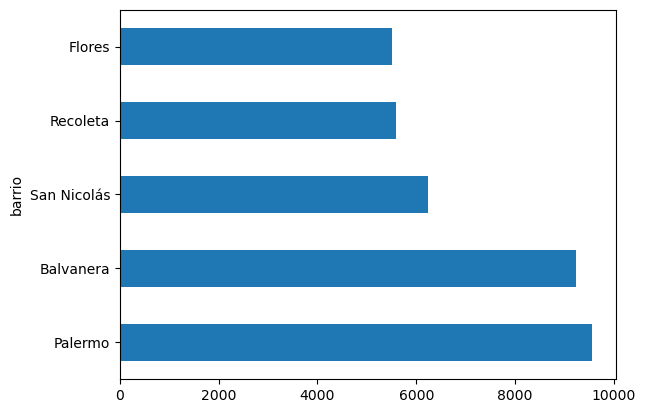

In [6]:
delitosBsAs["barrio"].value_counts().head(5).plot.barh() 

### *Los 5 barrios con MENOS delitos*

In [7]:
delitosBsAs["barrio"].value_counts().tail(5)

barrio
Coghlan          476
Agronomía        454
Versalles        392
Villa Real       343
Puerto Madero    283
Name: count, dtype: int64

### *Usar un gráfico de barras mostrar el top 5 de barrios más seguros.*

<Axes: ylabel='barrio'>

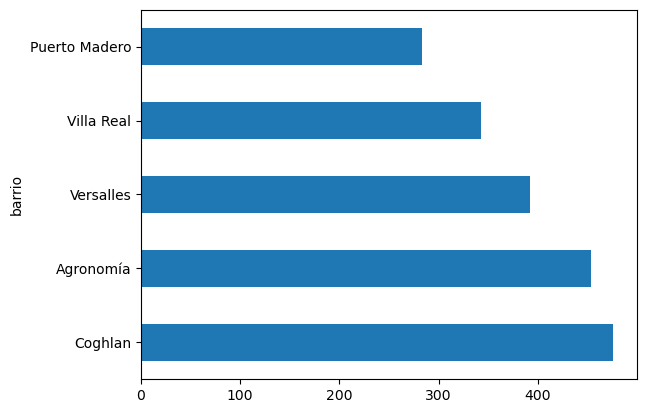

In [8]:
delitosBsAs["barrio"].value_counts().tail(5).plot.barh() 

### *Delitos ordenados por franja horaria: de mayor a menor*

In [9]:
delitosBsAs["franja_horaria"].value_counts()

franja_horaria
18     7415
19     7224
20     6990
17     6612
16     6518
14     6458
12     6407
21     6337
15     6315
13     6044
10     5536
11     5527
22     5449
8      5122
9      4931
23     4500
7      3897
0      3073
6      2998
1      2445
5      2357
2      1965
4      1814
3      1719
S/D       8
Name: count, dtype: int64

### *El día con mayor cantidad de delitos de todo el 2019 (usando groupby).*


In [10]:
delitosBsAs.groupby("fecha")["cantidad_registrada"].sum().idxmax()

'2019-03-11'

### *Crear una nueva columna llamada “mes”, y basarse en ella para averiguar cuál es el mes más inseguro*

In [11]:
delitosBsAs["fecha"] = pd.to_datetime(delitosBsAs["fecha"]) #Ver Modulo 5: Pandas X

#Creo un nuevo df con la serie "Mes" a la cual le aplico los meses desde "fecha"
delitosBsAs["Mes"] = delitosBsAs["fecha"].dt.month 

delitosBsAs["Mes"].value_counts()

Mes
3     11244
1     10503
5     10442
4     10255
2     10139
6      9634
11     9587
10     9415
8      9234
12     9124
7      9042
9      9042
Name: count, dtype: int64

In [12]:
delitosBsAs.groupby("Mes")["cantidad_registrada"].sum().idxmax()

3

<Axes: title={'center': 'Casos de Inseguridad según el mes.'}, xlabel='Mes'>

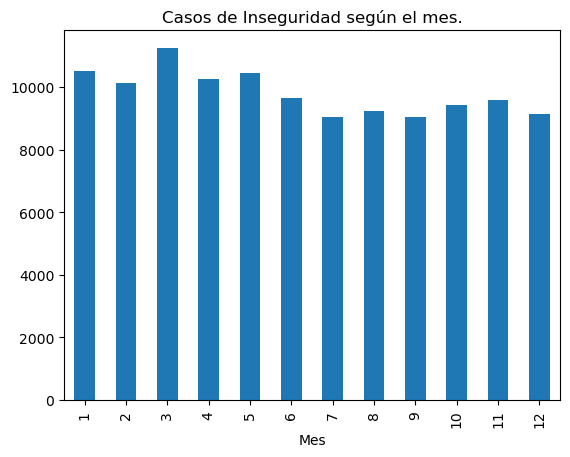

In [26]:
delitosBsAs.groupby("Mes")["cantidad_registrada"].sum().dropna().\
plot.bar(title="Casos de Inseguridad según el mes.")

### *Para finalizar hacer un gráfico de torta de “tipo de delito”, ¿cuál es el que más frecuente según el gráfico?*

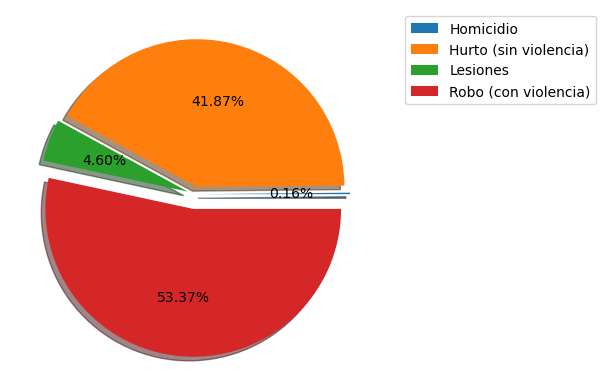

In [14]:
valores=delitosBsAs.groupby("tipo_delito")["cantidad_registrada"].sum() #Total de registros x delitos <--- Es una SERIE !!!
etiquetas=valores.index #Aqui tomo los indices de la serie "valores" para utilizarla como etiquetas del grafico.

fig, ax=plt.subplots() #Ver: Interfaz orientada a objetos en Modulo 6: Subplots

plt.pie(valores, autopct='%.2f%%', explode=[0.05,0.05,0.05,0.1], shadow=True)
plt.legend(etiquetas, bbox_to_anchor=(1.05, 1), loc="upper left")

#Complemento: --> https://juncotic.com/grafico-de-torta-con-matplotlib/